# Table of Contents 
1. [Introduction](#introduction) 
2. [Importing Libaries and Dataset](#paragraph1)
3. [Data Inspection](#paragraph2)
4. [Data Cleaning](#paragraph3)
5. [Exploratory Data Analysis](#paragraph4) 
6. [Model Building](#paragraph5) 
7. [Prediction](#paragraph6) 



## Introduction <a name="introduction"></a>

The purpose of this project is to practice/become familiar with data analysis techniques such as data visualization and statistical methods such as linear regression. In order to do this, we consider how regression can be used to predict california housing prices with a sample dataset. The dataset is found at: https://www.kaggle.com/datasets/camnugent/california-housing-prices.

## 1. Importing Libaries and Dataset <a name="paragraph1"></a> 



In [476]:
# Importing packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore') 

In [477]:
# Loading the dataset 
df = pd.DataFrame(pd.read_csv("/Users/mattyro/Downloads/housing.csv"))

## 2. Data Inspection <a name ="paragraph2"></a> 

In [478]:
df.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [479]:
df.info() 

df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [480]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [481]:
df.shape

(20640, 10)

## 3. Data Cleaning <a name ="paragraph2"></a>

In [482]:
# Checking for the number of duplicates
duplicate_counts = {} 

for column in df.columns: 
    total_count = df[column].count() 
    unique_count = df[column].nunique() 
    duplicate_counts[column] = total_count - unique_count

print(duplicate_counts)

{'longitude': 19796, 'latitude': 19778, 'housing_median_age': 20588, 'total_rooms': 14714, 'total_bedrooms': 18510, 'population': 16752, 'households': 18825, 'median_income': 7712, 'median_house_value': 16798, 'ocean_proximity': 20635}


In [483]:
df.duplicated().value_counts() 

False    20640
dtype: int64

In [484]:
# Checking for any null values
df.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Here we can see that there are 207 null values in the "total bedrooms" column. There are several ways to deal with missing data but the strategy we choose to implement is the fillna() method. This method is used to replace the missing data with a statistically calcualted value. We choose to replace the missing values with the median value. 

In [485]:
df.fillna(df['total_bedrooms'].median(), axis=0, inplace=True)

In [486]:
df.isnull().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Hence, we can see that there is no longer any missing data in our DataFrame. 

## 4. Exploratory Data Analysis <a name= "paragraph4"></a>

In order to better understand the data, we take a deeper look (primarily) through data visualization. 

Text(0.5, 1.0, 'Ocean Proximity count')

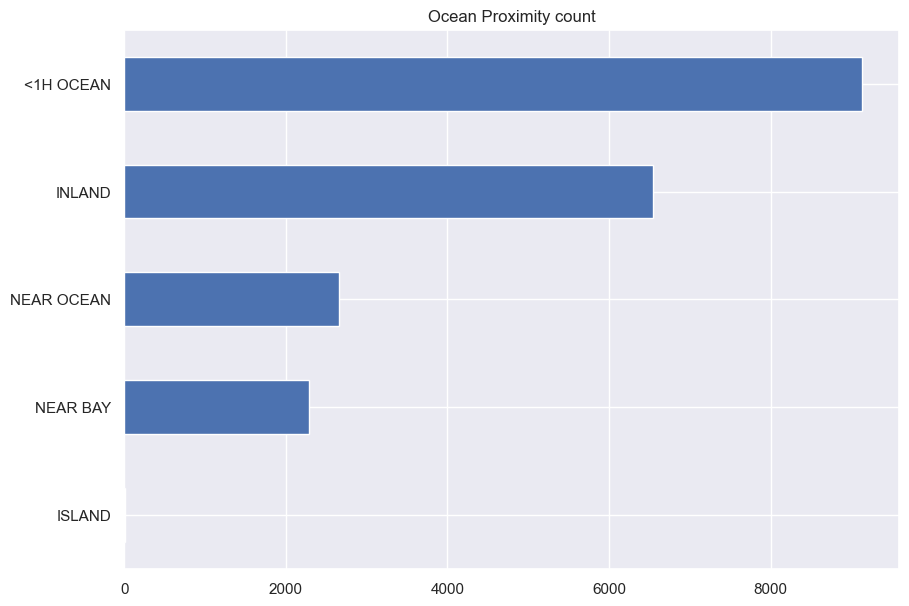

In [487]:
# Taking a look at the ocean proximity count
sns.set(palette = 'deep') 
df.ocean_proximity.value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize = (10,7))
plt.title("Ocean Proximity count")

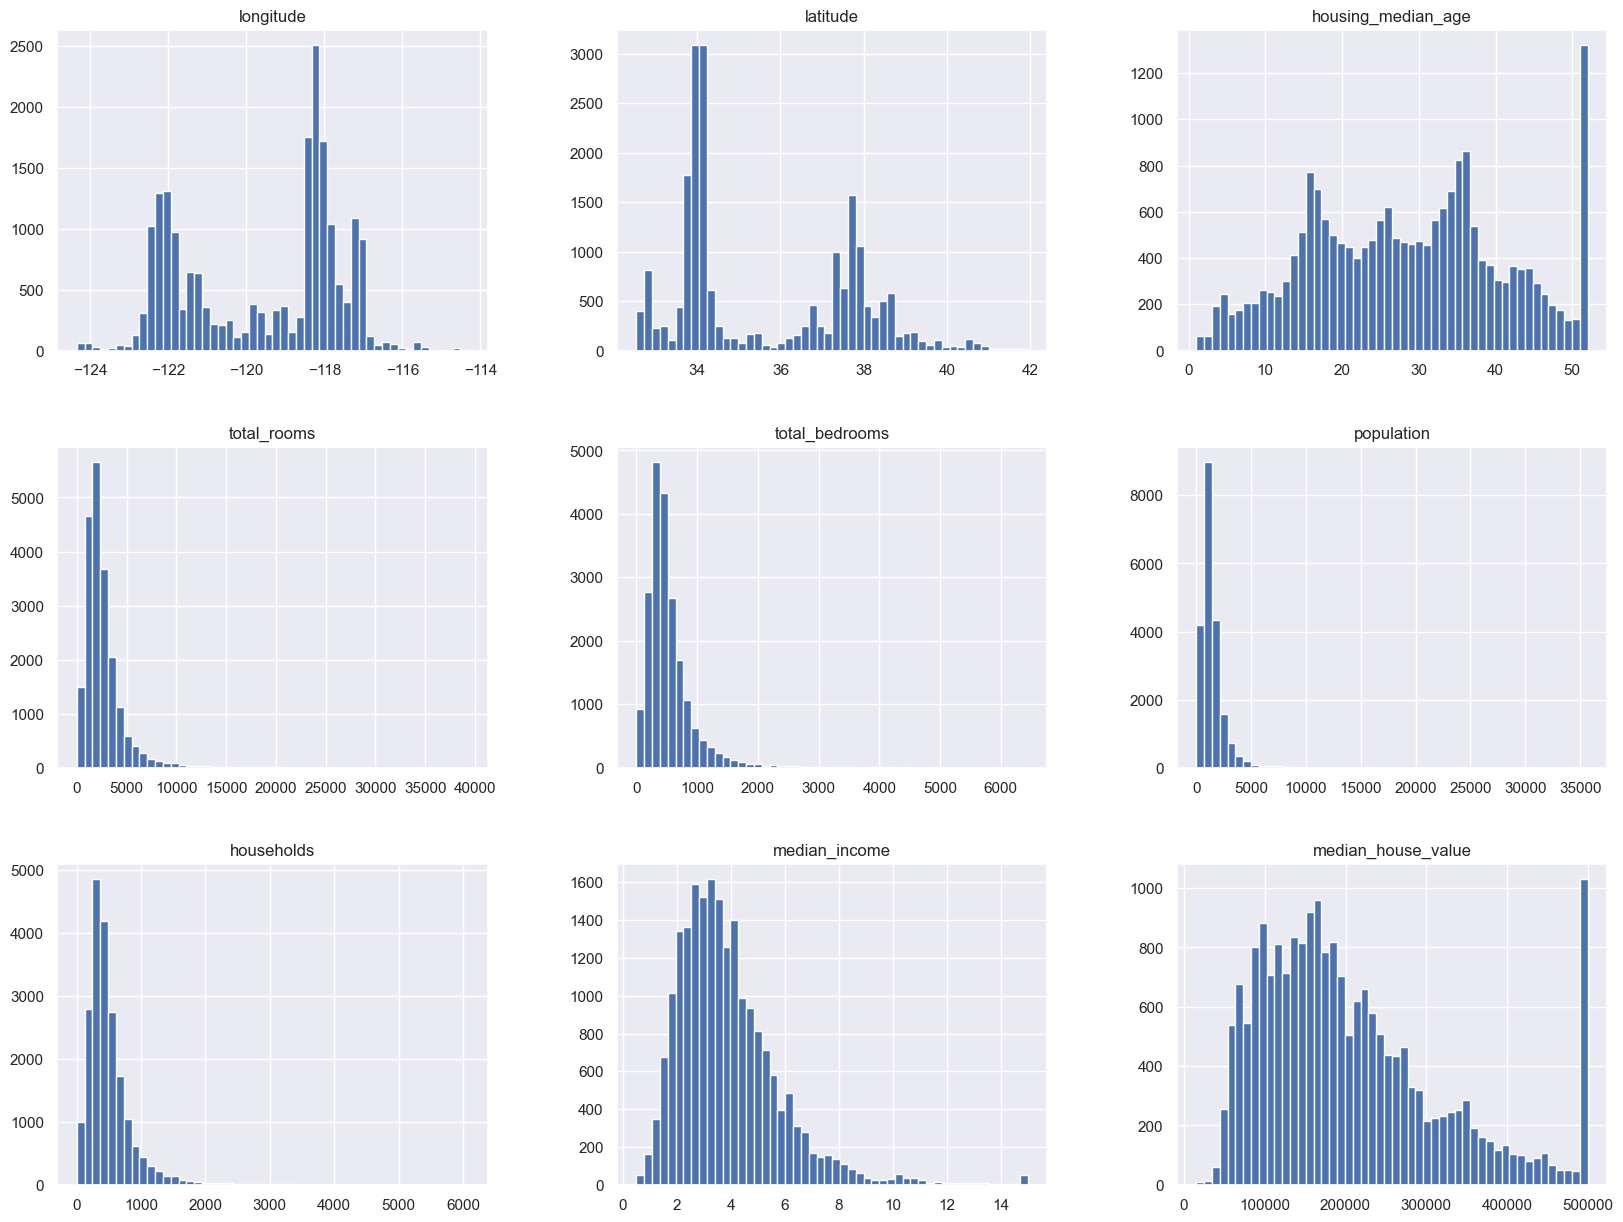

In [488]:
# Histograms of the dataset
df.hist(bins=50, figsize=(20,15)) 
plt.show() 

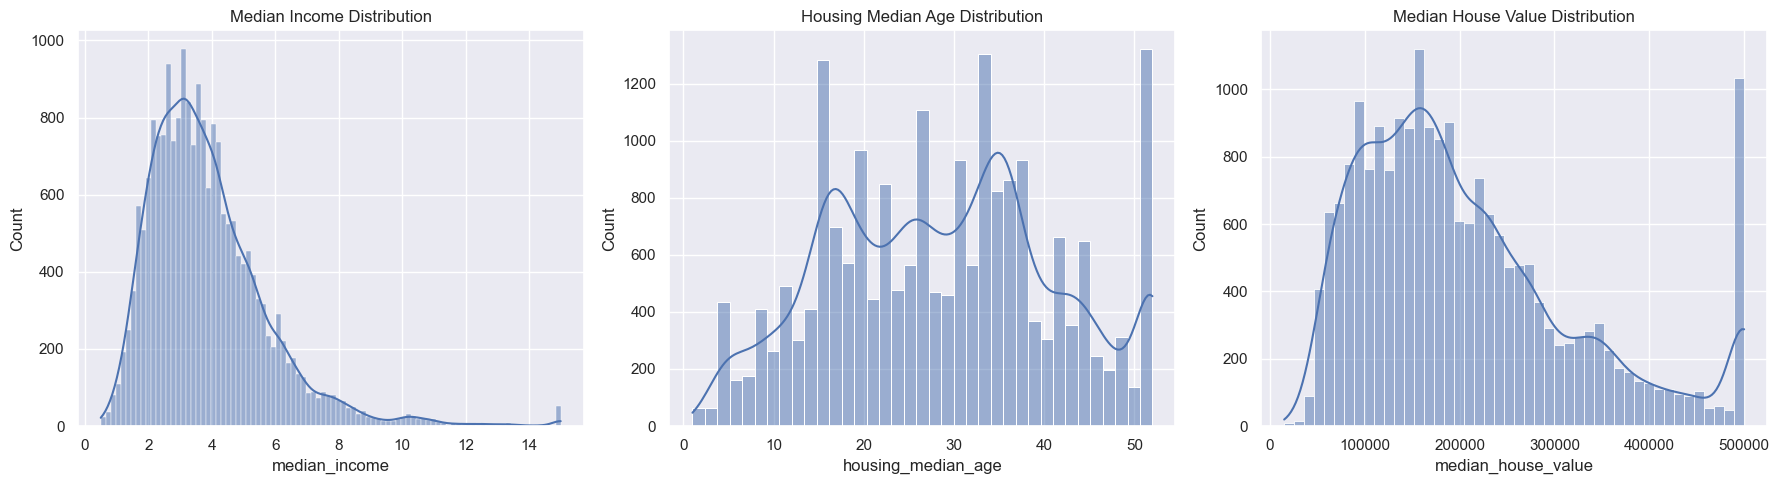

In [489]:
# Distributions of Median Income, Median Age, and Median House Value 
fig, axes = plt.subplots(nrows =1, ncols =3, figsize = (18,5)) 

sns.histplot(df['median_income'], kde = True, ax=axes[0])
axes[0].set_title('Median Income Distribution')

sns.histplot(df['housing_median_age'], kde = True, ax=axes[1])
axes[1].set_title('Housing Median Age Distribution')

sns.histplot(df['median_house_value'], kde = True, ax=axes[2])
axes[2].set_title('Median House Value Distribution')

plt.tight_layout()
plt.show() 

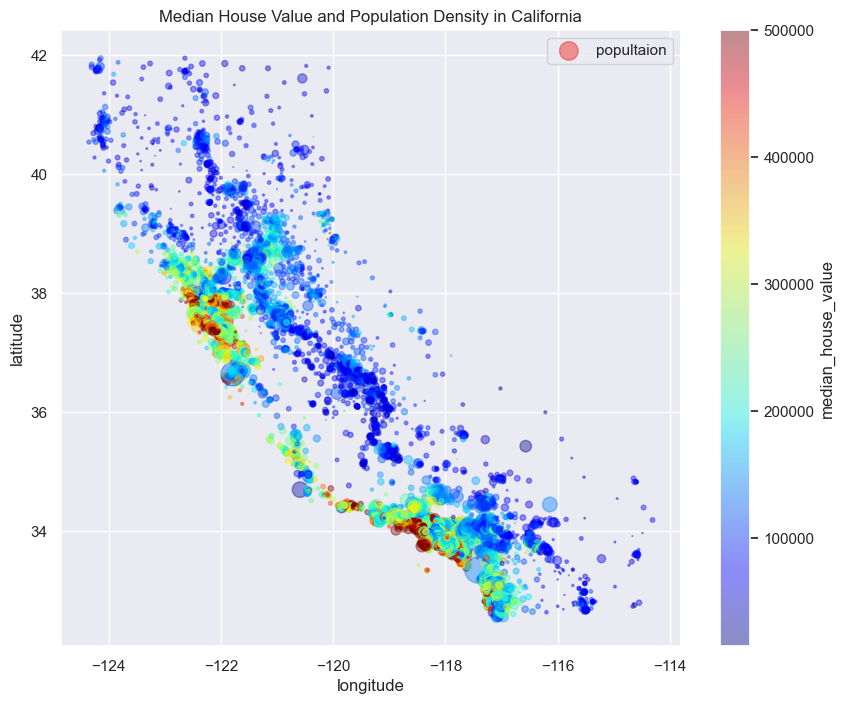

In [490]:
# Scatter plot of median house value and population
df.plot(kind= 'scatter', x='longitude', y='latitude', alpha =0.4,
        s=df['population']/100, label ='popultaion', c = 'median_house_value',
        cmap ="jet", colorbar=True, grid = True, figsize=(10,8))

plt.title("Median House Value and Population Density in California")
plt.show() 

This scatter plot indicates which areas of California are more expensive compared to others. As we expect, the higher populated city areas such as the bay area in Northern California and Los Angeles in Southern California are the most expensive. These locations are also highly dense and populated areas. 

In [491]:
fig = px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', 
                        hover_name = 'ocean_proximity', color = 'median_house_value',
                        size = 'population', zoom = 4, height = 600)
fig.update_layout(mapbox_style = "open-street-map")

fig.show() 

Now suppose we wish to look at how each variable in our dataset is related to one another. We can show this by using a correlation heatmap. In a correlation heatmap, the darker shaded regions indicate a higher correlation as opposed to a lighter shaded region (less correlated). 

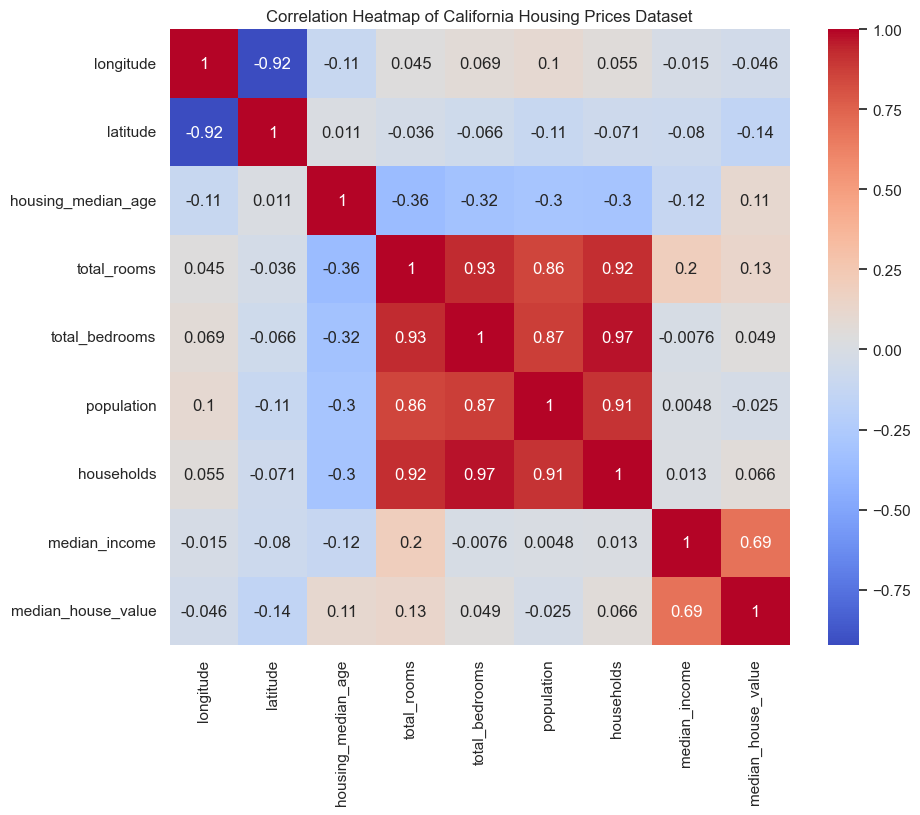

In [492]:
# correlation heatmap 
plt.subplots(figsize= (10,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

plt.title('Correlation Heatmap of California Housing Prices Dataset')
plt.show()


In [493]:
# Looking at which variables are strongly correlated to median house value
correlations = df.corr() 
res = correlations['median_house_value'].abs().sort_values(ascending = False)
print(res) 


median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64


According to our correlation heatmap, we can see which variables have higher correlation to the median house value. Columns in our dataset such as the housing median age, total rooms, and median income are strongly correlated to the median house value. However, this correlation heatmap does not have all of the information in our dataset. Since ocean proximity is not a numeric data type, we use the "get_dummies()" method from pandas to create a new binary column for each category.

In [494]:
df1 = pd.get_dummies(df['ocean_proximity']) 
df1 

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [495]:
df = pd.concat([df, df1], axis=1)
df = df.drop(['ocean_proximity'], axis=1)

In [496]:
# Represent the correlation matrix as a DataFrame
correlation_matrix = df.corr() 

correlation_matrix 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.017966,-0.006158,-0.004322,-0.019667,0.000557
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.017966,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


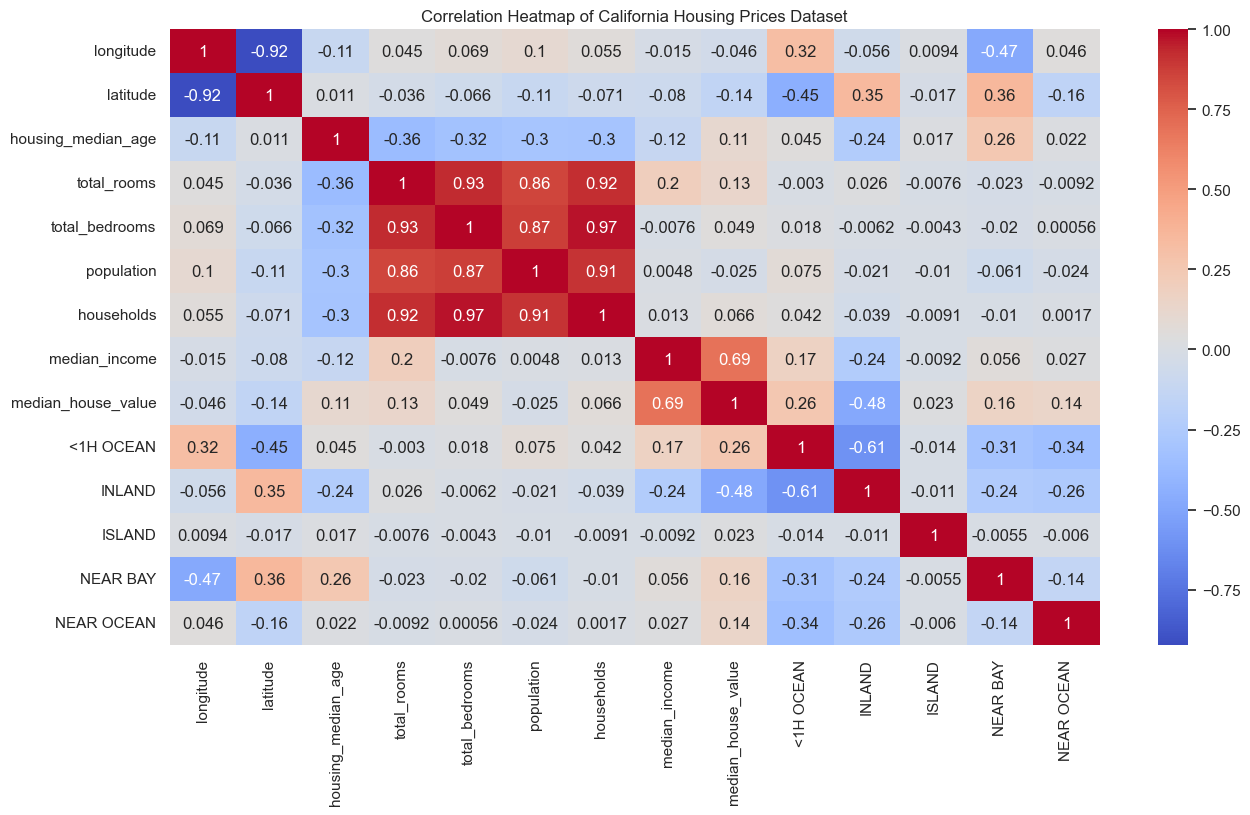

In [497]:
# correlation heatmap 
plt.subplots(figsize= (15,8))
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True)

plt.title('Correlation Heatmap of California Housing Prices Dataset')
plt.show()


In [498]:
correlations = df.corr() 
res = correlations['median_house_value'].abs().sort_values(ascending = False)
print(res) 


median_house_value    1.000000
median_income         0.688075
INLAND                0.484859
<1H OCEAN             0.256617
NEAR BAY              0.160284
latitude              0.144160
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
longitude             0.045967
population            0.024650
ISLAND                0.023416
Name: median_house_value, dtype: float64


## 5. Model Building <a name ="paragraph5"></a>
We want to build a statistical regression model which can sufficiently predict the median house price in California. We begin by considering the Linear Regression model first. If the Linear Regression model is not very accurate, then we choose to consider other models. 

In [499]:
X = df.drop(['median_house_value'], axis=1)
y = df[['median_house_value']] 

In [500]:
# Splitting into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 16)


In [501]:
# Linear Regression
lm = LinearRegression().fit(x_train, y_train)

In [502]:
# Coefficient of determination
print(lm.score(x_train,y_train))

0.647883356702712


This is a bit lower than what we would like to have, so we need to find another model that is more accurate. However, instead doing the same thing over and over for each model, let's create a function which takes in a given dataframe and computes the accuracy of several models. The models we are interested in are: KNeighborsRegressor, LinearRegression, DecisionTreeRegressor, and RadnomForestRegressor models.

In [503]:
# Creating a function which given a dataframe, calculates and compares: KNeighborsRegressor, LinearRegression, DecisionTreeRegressor, and RadnomForestRegressor models
def housing_fit_model_prediction(df): 
    X1 = df.drop(['median_house_value'], axis=1)
    y1 = df['median_house_value']
    x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size= 0.2, random_state = 16) 
    models = {"KNeighborsRegressor" : KNeighborsRegressor(), "LinearRegression" : LinearRegression(), 
              "DecisionTreeRegressor" : DecisionTreeRegressor(), "RandomForestRegressor" : RandomForestRegressor()}
    print("Models accuracy")
    for key, model in models.items(): 
        model.fit(x_train, y_train) 
        y_pred = model.predict(x_test) 
        print(f"{key}: {round(r2_score(y_test,y_pred)*100)}%")
housing_fit_model_prediction(df) 

Models accuracy
KNeighborsRegressor: 27%
LinearRegression: 63%
DecisionTreeRegressor: 65%
RandomForestRegressor: 83%


Therefore, we can deduce that the RandomForestRegressor model is the highest performing model at 83%. Let's take a closer look into our RandomForestRegressor Model and how it can be used to predict a hypothetical housing price in California.

## 6. Prediction <a name="paragraph6"></a>
Finally, let's use our RandomForestRegressor model to predict the median house price in California given hypothetical values for each column. 

In [504]:
# RandomForestRegressor Model 
X = df.drop(['median_house_value'], axis =1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 16) 
model = RandomForestRegressor().fit(x_train, y_train) 
df1 = {'longitude' : -118.2, 'latitude' : 33.8, 'housing_median_age' : 23.0, 'total_rooms' : 880.0, 'total_bedrooms' : 129.0, 'population' : 1132.0,
       'households' :259.7, 'median_income' : 15.74, '<1H OCEAN' : 1.0, 'INLAND' : 0.0, 'ISLAND' : 0.0, 'NEAR BAY' : 0.0, 'NEAR OCEAN' : 0.0 }
test = pd.DataFrame(df1, index=[1])
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1,-118.2,33.8,23.0,880.0,129.0,1132.0,259.7,15.74,1.0,0.0,0.0,0.0,0.0


In [505]:
#Calcualte the price of the house 
price_of_house = int(model.predict(test))
print(f"Estimated price: ${price_of_house}")

Estimated price: $494563
